In [1]:
# Importing required libraries
# Waxaan soo darsanaynaa maktabadaha loo baahan yahay

import pandas as pd          # Data handling / maamulka xogta
import numpy as np           # Numerical operations / xisaab
import matplotlib.pyplot as plt  # Visualization / sawir-qaadis
import seaborn as sns        # Advanced visualization / sawir qurux badan

from sklearn.model_selection import train_test_split  # Data splitting
from sklearn.linear_model import LinearRegression     # Regression model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [9]:
# Load the laptop price dataset
# Soo gelinta xogta laptop prices-ka

df = pd.read_csv(
    "C:/Users/HP/Downloads/laptop_price.csv",
    encoding="latin1"
)
# Display first 5 rows
# Muujin 5-ta saf ee ugu horeeya
df.head()


laptop_ID Company      Product   TypeName  Inches  \
0          1   Apple  MacBook Pro  Ultrabook    13.3   
1          2   Apple  Macbook Air  Ultrabook    13.3   
2          3      HP       250 G6   Notebook    15.6   
3          4   Apple  MacBook Pro  Ultrabook    15.4   
4          5   Apple  MacBook Pro  Ultrabook    13.3   

                     ScreenResolution                         Cpu   Ram  \
0  IPS Panel Retina Display 2560x1600        Intel Core i5 2.3GHz   8GB   
1                            1440x900        Intel Core i5 1.8GHz   8GB   
2                   Full HD 1920x1080  Intel Core i5 7200U 2.5GHz   8GB   
3  IPS Panel Retina Display 2880x1800        Intel Core i7 2.7GHz  16GB   
4  IPS Panel Retina Display 2560x1600        Intel Core i5 3.1GHz   8GB   

                Memory                           Gpu  OpSys  Weight  \
0            128GB SSD  Intel Iris Plus Graphics 640  macOS  1.37kg   
1  128GB Flash Storage        Intel HD Graphics 6000  macOS  1.34kg   
2            256GB SSD         Intel HD Graphics 620  No OS  1.86kg   
3            512GB SSD            AMD Radeon Pro 455  macOS  1.83kg   
4            256GB SSD  Intel Iris Plus Graphics 650  macOS  1.37kg   

   Price_euros  
0      1339.69  
1       898.94  
2       575.00  
3      2537.45  
4      1803.60

In [11]:
# Check dataset shape (rows, columns)
# Fiiri tirada rows iyo columns-ka

df.shape

# Display dataset information (data types & missing values)
# Muujin noocyada xogta iyo xogta maqan

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   object 
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   object 
 12  Price_euros       1303 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


In [12]:
# Statistical summary of numerical columns
# Soo koobida xogta tirooyinka (celcelis, min, max)

df.describe()


laptop_ID       Inches  Price_euros
count  1303.000000  1303.000000  1303.000000
mean    660.155794    15.017191  1123.686992
std     381.172104     1.426304   699.009043
min       1.000000    10.100000   174.000000
25%     331.500000    14.000000   599.000000
50%     659.000000    15.600000   977.000000
75%     990.500000    15.600000  1487.880000
max    1320.000000    18.400000  6099.000000

In [13]:
# Check for missing values
# Hubinta xog maqan

df.isnull().sum()


laptop_ID           0
Company             0
Product             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price_euros         0
dtype: int64

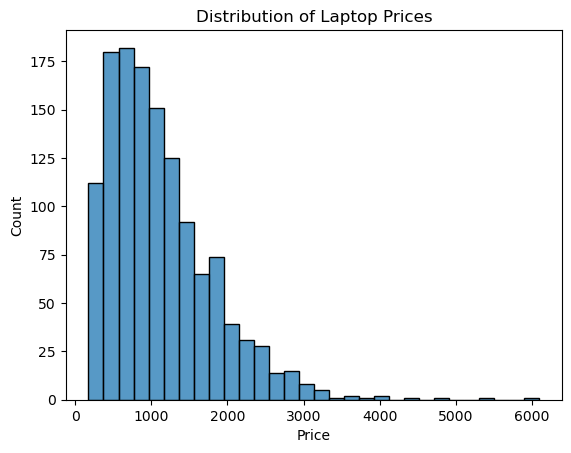

In [15]:
# Plot distribution of laptop prices
# Sawir muujinaya sida qiimuhu u kala firdhisan yahay

plt.figure()
sns.histplot(df['Price_euros'], bins=30)
plt.title("Distribution of Laptop Prices")
plt.xlabel("Price")
plt.ylabel("Count")
plt.show()


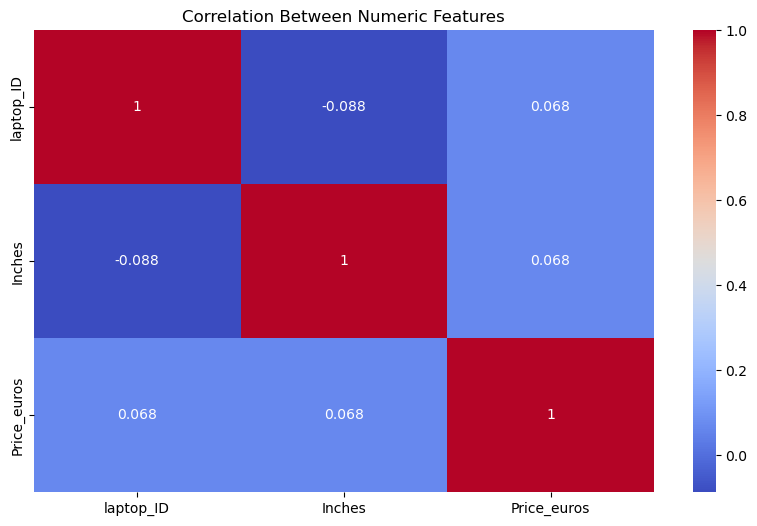

In [16]:
# Correlation heatmap to see relationships
# Heatmap muujinaya xiriirka u dhexeeya features-ka

plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Between Numeric Features")
plt.show()


In [17]:
# Convert categorical columns to numerical using one-hot encoding
# U bedelidda xogta qoraalka ah (Brand, CPU) tirooyin

df_encoded = pd.get_dummies(df, drop_first=True)

# Display encoded dataset
# Muujin xogta la beddelay
df_encoded.head()


laptop_ID  Inches  Price_euros  Company_Apple  Company_Asus  Company_Chuwi  \
0          1    13.3      1339.69           True         False          False   
1          2    13.3       898.94           True         False          False   
2          3    15.6       575.00          False         False          False   
3          4    15.4      2537.45           True         False          False   
4          5    13.3      1803.60           True         False          False   

   Company_Dell  Company_Fujitsu  Company_Google  Company_HP  ...  \
0         False            False           False       False  ...   
1         False            False           False       False  ...   
2         False            False           False        True  ...   
3         False            False           False       False  ...   
4         False            False           False       False  ...   

   Weight_4.2kg  Weight_4.33kg  Weight_4.36kg  Weight_4.3kg  Weight_4.42kg  \
0         False          False          False         False          False   
1         False          False          False         False          False   
2         False          False          False         False          False   
3         False          False          False         False          False   
4         False          False          False         False          False   

   Weight_4.4kg  Weight_4.5kg  Weight_4.6kg  Weight_4.7kg  Weight_4kg  
0         False         False         False         False       False  
1         False         False         False         False       False  
2         False         False         False         False       False  
3         False         False         False         False       False  
4         False         False         False         False       False  

[5 rows x 1140 columns]

In [21]:
# Separate features (X) and target variable (y)
# Kala saarida inputs (X) iyo output (Price)

X = df_encoded.drop("Price_euros", axis=1)
y = df_encoded["Price_euros"]


In [22]:
# Split data into training and testing sets
# Kala qaybinta xogta: tababar iyo tijaabo

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)


In [23]:
# Create and train the Linear Regression model
# Abuurista iyo tababaridda regression model-ka

model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [24]:
# Predict laptop prices using test data
# Saadaalinta qiimaha laptop-ka

y_pred = model.predict(X_test)


In [25]:
# Evaluate model performance
# Qiimeynta waxqabadka model-ka

mae = mean_absolute_error(y_test, y_pred)   # Average error / qalad celcelis
mse = mean_squared_error(y_test, y_pred)    # Squared error / qalad la labajibaaray
r2 = r2_score(y_test, y_pred)                # Model accuracy / saxnaanta model-ka

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("R2 Score:", r2)


Mean Absolute Error (MAE): 275.2814877324349
Mean Squared Error (MSE): 173440.54294021038
R2 Score: 0.6761025921336274


In [26]:
# Visualize actual vs predicted prices
# Sawir muujinaya qiimaha dhabta ah iyo kan la saadaaliyay

plt.figure()
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Laptop Prices")
plt.show()


In [27]:
# Display feature coefficients
# Muujin features-ka ugu saamaynta badan qiimaha

coefficients = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": model.coef_
})

coefficients.sort_values(by="Coefficient", ascending=False).head(10)


Feature  Coefficient
129      Product_EliteBook 820  2053.217762
133     Product_EliteBook x360  1943.268333
974              Weight_1.13kg  1907.995429
135      Product_Elitebook 820  1821.603456
291         Product_Laptop MSI  1616.300654
948   Gpu_Nvidia Quadro M3000M  1428.599352
391        Product_Probook 640  1328.061407
194         Product_GS60 Ghost  1250.601218
1111             Weight_3.21kg  1222.907087
1118             Weight_3.49kg  1189.383243

In [ ]:
## Conclusion
This project successfully predicts laptop prices using Multiple Linear Regression.
RAM, CPU type, and storage have the strongest impact on price.

Mashruucan wuxuu si guul leh u saadaaliyay qiimaha laptop-ka iyadoo la adeegsanayo
Multiple Linear Regression. RAM, CPU, iyo storage ayaa ah kuwa ugu saameynta badan.

## Future Work
- Use advanced models like Random Forest
- Include GPU specifications
- Build a price prediction web app
